# Orders - Multivariate Regression of  the `review_score`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Utilizar de dataset el resultado de la clase pasada (con la distancia)



In [3]:
orders = pd.read_csv("data/tablon_primario.cv")

Let's recall our simple analysis from yesterday's exercise: 

¿ Aqué esta correlacionada `review_score`?
 * Si dos variables tmb tienen correlación entre sí deberíamos analizarla por separado
  *  Probar con `statsmodels`: `tiempo_de_espera` y `real_vs_esperado`

<Axes: >

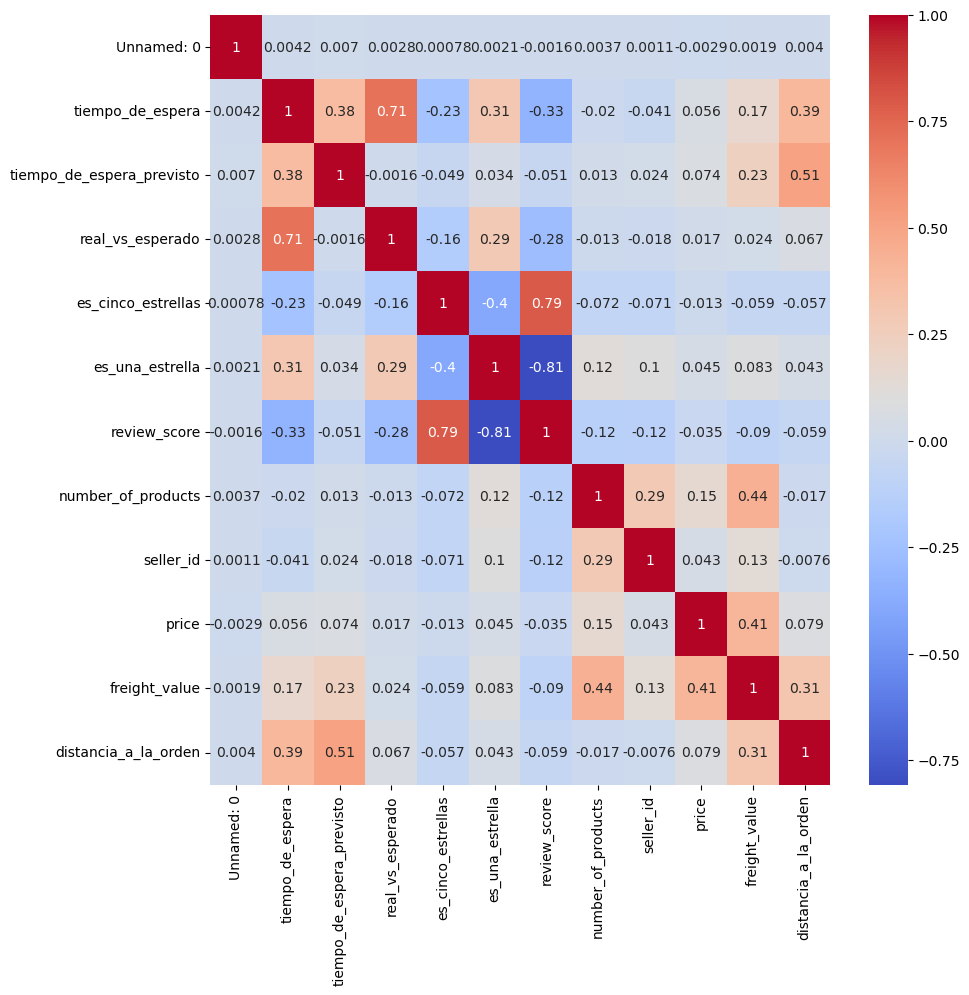

In [5]:
numeric_columns = orders.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas

plt.figure(figsize = (10, 10))

sns.heatmap(
    numeric_columns.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10})


Usar [statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) con `statsmodels.formula.api`
 - `model1`: una regresión ols de `review_score` sobre `tiempo_de_espera`
 - `model2`: una regresión ols de `review_score` sobre `real_vs_esperado`

Para cada uno, imprima la tabla `summary` e interprete los resultados:
- Entender cómo estos resultados coinciden con los del diagrama de seaborn
- Interpretar `R-squared`, así como `coeficientes de regresión individuales`, `valores t`, `valores p` e `intervalos de confianza del 95 %`

## 1 - Regresión Univariada

***Modelo 1***:

In [7]:
import statsmodels.formula.api as smf


# Programar acá

model1 = smf.ols(formula='review_score ~ tiempo_de_espera',data=orders)
model1=model1.fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                 1.204e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:32:43   Log-Likelihood:            -1.5441e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.7236      0.006    727.904      0.000       4.711       4.736
tiempo_de_espera    -0.0454      0.000   -109.730      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19552.934   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35454.407
Skew:                          -1.300   Prob(JB):                         0.00
Kurtosis:                       4.453   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo1=> y=4.7236 - 0.0454x (la x es el tiempo de espera y el primer termino es la ordenada al origen)



***Modelo 2***:

In [8]:
import statsmodels.formula.api as smf

# Programar acá

model2 = smf.ols(formula='review_score ~ real_vs_esperado',data=orders)
model2=model2.fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7982.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:33:00   Log-Likelihood:            -1.5623e+05
No. Observations:               95858   AIC:                         3.125e+05
Df Residuals:                   95856   BIC:                         3.125e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.2160      0.004   1042.188      0.000       4.208       4.224
real_vs_esperado    -0.0752      0.001    -89.341      0.000      -0.077      -0.074
==============================================================================
Omnibus:                    20681.655   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50302.380
Skew:                          -1.201   Prob(JB):                         0.00
Kurtosis:                       5.613   Cond. No.                         4.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo2=> y=4.216 - 0.0752x (la x es el tiempo de espera y el primer termino es la ordenada al origen)



El modelo que utiliza el tiempo de espera como variable independiente tiene un R cuadrado de 0.112, mientras que el modelo que utiliza la diferencia entre el tiempo esperado y el tiempo real de espera tiene un R cuadrado de 0.077. Esto significa que el tiempo de espera explica un poco más de la variación en la puntuación de reseñas que la diferencia entre el tiempo esperado y el tiempo real de espera.

Los coeficientes de regresión individuales muestran que, manteniendo todas las demás variables constantes, por cada unidad de aumento en el tiempo de espera, se espera una disminución de 0.0454 unidades en la puntuación de reseñas. Por cada unidad de aumento en la diferencia entre el tiempo esperado y el tiempo real de espera, se espera una disminución de 0.0752 unidades en la puntuación de reseñas.

Los valores t de los coeficientes de regresión son 109.730 y 89.341, respectivamente. Estos valores son muy altos, lo que indica que los coeficientes de regresión son estadísticamente significativos.

Los valores p de los coeficientes de regresión son 0.000 y 0.000, respectivamente. Estos valores son también muy bajos, lo que indica que los coeficientes de regresión son estadísticamente significativos.

Los intervalos de confianza de los coeficientes de regresión son 0.025 y 0.016, respectivamente. Estos intervalos son relativamente estrechos, lo que indica que los coeficientes de regresión son relativamente precisos.



## 2 - Multivariate regression

***responder***
¿Cual es el impacto en `review_score` agregando un día más de `real_vs_esperado` manteniendo todo lo otro constante? ¿Cuál es más explicativa de `review_score`,`tiempo_de_espera` o `real_vs_esperado` ?



***Modelo 3***:

In [9]:
# Programar

model3 = smf.ols(formula='review_score ~ tiempo_de_espera + real_vs_esperado ',data=orders)
model3=model3.fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     6222.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:36:02   Log-Likelihood:            -1.5422e+05
No. Observations:               95858   AIC:                         3.084e+05
Df Residuals:                   95855   BIC:                         3.085e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6432      0.008    599.481      0.000       4.628       4.658
tiempo_de_espera    -0.0376      0.001    -64.179      0.000      -0.039      -0.036
real_vs_esperado    -0.0221      0.001    -18.944      0.000      -0.024      -0.020
==============================================================================
Omnibus:                    20038.300   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41107.951
Skew:                          -1.244   Prob(JB):                         0.00
Kurtosis:                       5.024   Cond. No.                         31.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nuestra regresión multivariante nos permite aislar el impacto de una característica, mientras controlamos el efecto de otras características. Estos nuevos coeficientes se denominan **`coeficientes de correlación parcial`**.

 R-squared es bastante bajo: no más del 12 % de las variaciones de review_score se explican por las variaciones combinadas de `tiempo_de_espera` y `real_vs_esperado`.

Intentemos agregar más variables a nuestra regresión para mejorar la explicabilidad de la regresión lineal.

Crear un nuevo OLS `model4` con más características del conjunto de datos `orders`.
- No agregar dos características perfectamente colineales entre sí
-  Transformar cada variables $X_i$ con el respectivo z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$  para comparar los coeficientes de regresión parcial $\beta_i$ en conjuntos.  $\beta_i$ no estará en la misma dimensión.

***Modelo 4***:

¿Que variables considerar?

In [15]:
orders.columns

Index(['Unnamed: 0', 'order_id', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'tiempo_de_espera',
       'tiempo_de_espera_previsto', 'real_vs_esperado', 'es_cinco_estrellas',
       'es_una_estrella', 'review_score', 'number_of_products', 'seller_id',
       'price', 'freight_value', 'distancia_a_la_orden'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler

features = ['tiempo_de_espera','real_vs_esperado', 'number_of_products','seller_id', 'price', 'freight_value', 'distancia_a_la_orden']
scaler = StandardScaler()

# estandarizo lo que le mande en la variable y lo fiteo
orders[features] = scaler.fit_transform(orders[features])

In [17]:
orders

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_de_espera,tiempo_de_espera_previsto,real_vs_esperado,es_cinco_estrellas,es_una_estrella,review_score,number_of_products,seller_id,price,freight_value,distancia_a_la_orden
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-0.431195,15.536632,-0.169894,0,0,4,-0.264585,-0.11254,-0.513831,-0.652039,-0.979454
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.134174,17.858021,-0.169894,0,0,4,-0.264585,-0.11254,-0.086652,0.000493,0.429801
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-0.329909,26.628206,-0.169894,1,0,5,-0.264585,-0.11254,0.111745,-0.164035,-0.145453
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.073540,26.176400,-0.169894,1,0,5,-0.264585,-0.11254,-0.441551,0.206849,2.054722
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-1.019540,12.069109,-0.169894,1,0,5,-0.264585,-0.11254,-0.562419,-0.652039,-0.959094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95875,95875,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,-0.454311,18.587442,-0.169894,1,0,5,-0.264585,-0.11254,-0.311534,-0.449401,-0.893010
95876,95876,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.023847,23.450961,-0.169894,0,0,4,-0.264585,-0.11254,0.183977,-0.123135,-0.212756
95877,95877,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.305787,30.372037,-0.169894,1,0,5,-0.264585,-0.11254,0.333690,1.964596,0.617693
95878,95878,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.483667,37.099757,-0.169894,0,0,2,1.601698,-0.11254,1.075222,2.715658,-0.387522


Crear el `modelo4`

In [19]:
formula = "review_score ~ " + ' + '.join(features)
formula


'review_score ~ tiempo_de_espera + real_vs_esperado + number_of_products + seller_id + price + freight_value + distancia_a_la_orden'

In [20]:
#modelo4
model4 = smf.ols(formula,data=orders)
model4=model4.fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2327.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:14:56   Log-Likelihood:            -1.5254e+05
No. Observations:               95858   AIC:                         3.051e+05
Df Residuals:                   95850   BIC:                         3.052e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.1555      0.004   1082.775      0.000       4.148       4.163
tiempo_de_espera        -0.4320      0.006    -68.793      0.000      -0.444      -0.420
real_vs_esperado        -0.0606      0.006    -10.516      0.000      -0.072      -0.049
number_of_products      -0.1295      0.004    -28.824      0.000      -0.138      -0.121
seller_id               -0.1313      0.004    -32.723      0.000      -0.139      -0.123
price                   -0.0029      0.004     -0.685      0.494      -0.011       0.005
freight_value            0.0039      0.005      0.781      0.435      -0.006       0.014
distancia_a_la_orden     0.0945      0.005     20.461      0.000       0.085       0.103
==============================================================================
Omnibus:                    18794.119   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38470.286
Skew:                          -1.171   Prob(JB):                         0.00
Kurtosis:                       5.037   Cond. No.                         3.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
coeficientes = model4.params.drop('Intercept')
coeficientes


tiempo_de_espera       -0.432010
real_vs_esperado       -0.060650
number_of_products     -0.129532
seller_id              -0.131301
price                  -0.002889
freight_value           0.003879
distancia_a_la_orden    0.094452
dtype: float64

In [22]:
nombres_caracteristicas = coeficientes.index
nombres_caracteristicas


Index(['tiempo_de_espera', 'real_vs_esperado', 'number_of_products',
       'seller_id', 'price', 'freight_value', 'distancia_a_la_orden'],
      dtype='object')

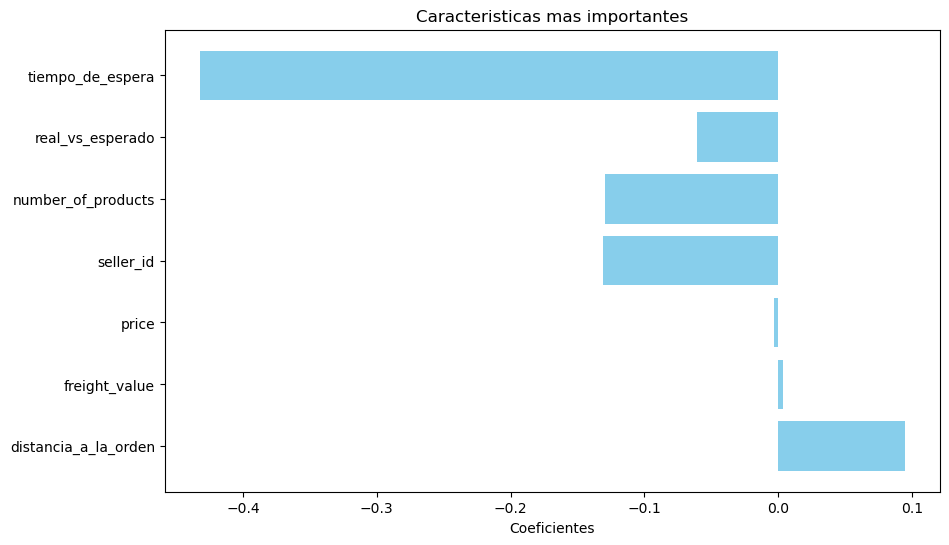

In [23]:
#ajuto el grafico
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, [coef for coef in coeficientes], color='skyblue')
plt.xlabel('Coeficientes')
plt.title('Caracteristicas mas importantes')
plt.gca().invert_yaxis() #esto lo hago para ver la mas significativa primero
plt.show()


In [ ]:
#explicacion

---
- ¿Cuáles son las características más importantes? (hacer un gráfico de barras para visualizarlos bien)
- ¿Cómo ha cambiado el rendimiento general de la regresión?
- ¿Es esta regresión estadísticamente significativa?

In [21]:
#


- ¿Cual es la variable que más impacto tiene?
- qué pasa con productos y vendedores cuando hay más?
- Que pasa con la distancia?
- Que pasa con precio y transporte?
    
- Qué pasa con F-statistics y p-value?

- Analizar R cuadrado

Un R cuadrado bajo es común cuando el número de observaciones (n) es mucho mayor que el número de características (p). Todavía se pueden derivar ideas relevantes de tales regresiones, siempre que sean estadísticamente significativas.





## 3 - Chequear la performance de modelos

¡El rendimiento de la regresión no debe medirse solo por su R-cuadrado!

Siempre visualice la distribución de las predicciones, y especialmente los residuales.

* Calcular los residuos.

Debería ver que la media de los residuos es igual a 0 (siempre verificado en un contexto de regresión lineal)

In [24]:
##codear

residuos = model4.predict(orders[features]) - orders["review_score"]
residuos


0        0.307557
1        0.197716
2       -0.657341
3       -0.620787
4       -0.436209
           ...   
95875   -0.674090
95876   -0.248584
95877   -1.284282
95878    1.734965
95879   -0.558950
Length: 95880, dtype: float64

Computar rmse

In [25]:
residuos.mean()


6.697890797146055e-16

In [28]:
##codear RMS (Buscar en wikipedia)

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
y_real = orders['review_score']
X = orders[features]
X = sm.add_constant(X)  
X = X.fillna(X.mean())
y_pred = model4.predict(X)

# calculo del error cuadrado medio (MSE)
mse = mean_squared_error(y_real, y_pred)

#calculo el RMSE como la raíz cuadrada del MSE
rmse = np.sqrt(mse)
#imprimo el resultado
print("RMSE:", rmse)


RMSE: 1.1881493431834


Plotear los resultados

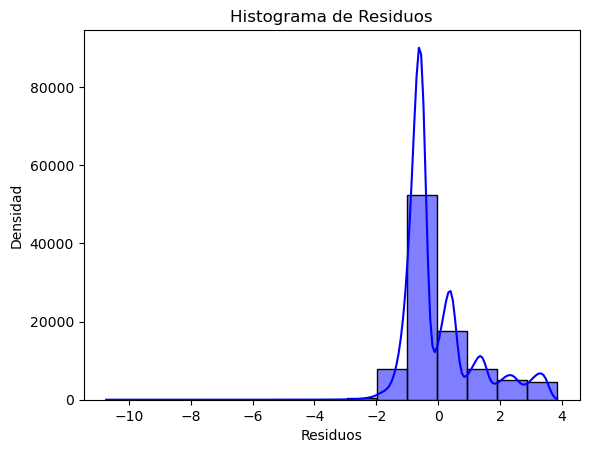

In [29]:
sns.histplot(residuos, kde=True, color='blue', bins=15)

#configuracion del grafico
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.title('Histograma de Residuos')

plt.show()


* ¿Por qué la trama residual tiene una forma tan extraña?

Plotea en el mismo gráfico tanto la distribución de `review_score` como la distribución de `predicted_review_score`.

In [30]:
y_pred = model4.predict(orders[features])
y_real = orders["review_score"]


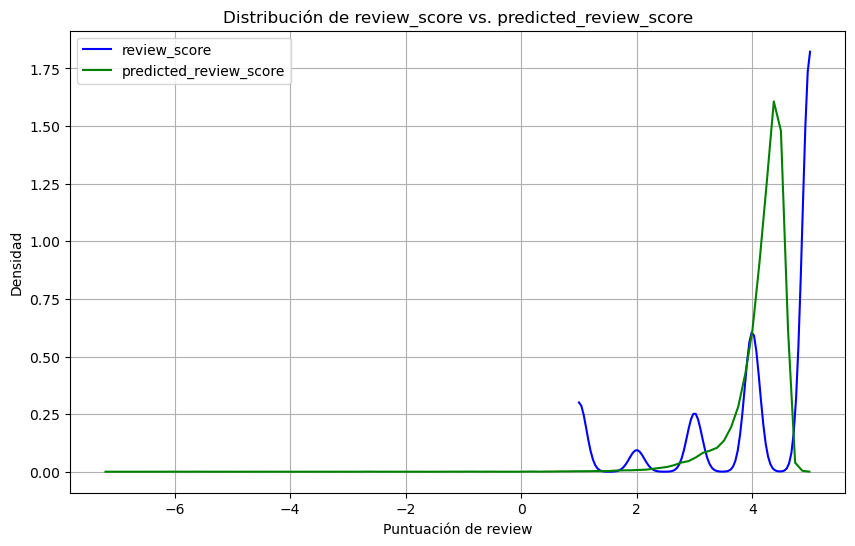

In [31]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
y_pred = y_pred.dropna()
# KDE de datos reales
kde_real = gaussian_kde(y_real)
x_real = np.linspace(min(y_real), max(y_real), 100)
# Graficar la línea azul sin relleno y sin otros elementos
plt.plot(x_real, kde_real(x_real), color='blue', linestyle='-', fillstyle='none', label='review_score')

# KDE de datos predichos
kde_pred = gaussian_kde(y_pred)
x_pred = np.linspace(min(y_pred), max(y_pred), 100)
# Graficar la línea verde sin relleno y sin otros elementos
plt.plot(x_pred, kde_pred(x_pred), color='green', linestyle='-', fillstyle='none', label='predicted_review_score')

# Configura el gráfico
plt.xlabel('Puntuación de review')
plt.ylabel('Densidad')
plt.title('Distribución de review_score vs. predicted_review_score')
plt.legend()

# Muestra el gráfico
plt.grid(True)
plt.show()


la linea predictiva es la verde, mientras que la linea azul me plotea la distribucion de la variable , se puede ver en la prediccion un fuerte pico en el puntaje de review en el 4

Usando `seaborn`, ya podríamos haber trazado una `línea de regresión` de `review_score` frente a `real_vs_esperado`

Hacelo con una sub-`muestra` de la población, y una vez con la `toda la población`.

In [32]:
orders.size


1917600

In [33]:
suborders = orders.sample(10000) #agarro una muestra de mi poblacion, elegi que sea de 10000


/Users/pedrosaluzzi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


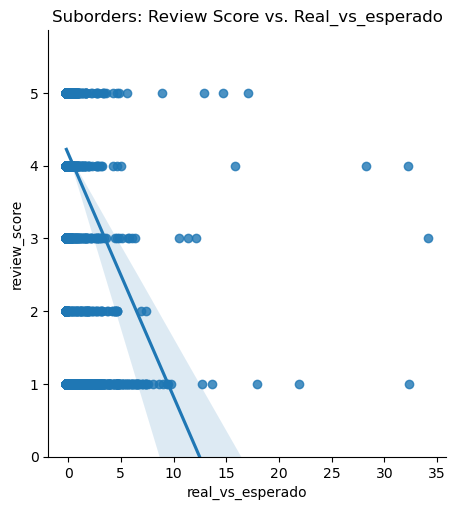

In [34]:
sns.lmplot(x="real_vs_esperado", y="review_score", data=suborders) #uso como data la muestra

plt.title("Suborders: Review Score vs. Real_vs_esperado")
plt.ylim(0, None)

# Mostrar el gráfico
plt.show()


/Users/pedrosaluzzi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


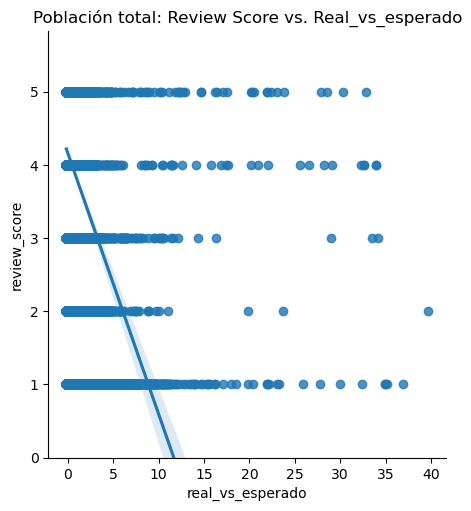

In [35]:
sns.lmplot(x="real_vs_esperado", y="review_score", data=orders) #uso como data toda la poblacion de orders

#ajute del grafico
plt.title("Población total: Review Score vs. Real_vs_esperado")
plt.ylim(0, None)
plt.show()

